In [9]:
#libraries
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, Embedding
import pandas as pd

#corpus
corpus = [
    'This is good pizza', 'I love Italian pizza', 'The best pizza',
    'nice pizza', 'Excellent pizza', 'I love pizza', 'The pizza was alright',
    'disgusting pineapple pizza', 'not good pizza', 'bad pizza',
    'very bad pizza', 'I had better pizza'
]

# Creating class labels for each sentence
labels = [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]

#data frame with corpus and labels
df = pd.DataFrame({'text': corpus, 'sentiment': labels})

# Extracting and encoding voc
vocab_size = 50
encoded_corpus = [one_hot(sentence, vocab_size) for sentence in df['text']]

# Padding the documents to the maximum length of the longest sentences
max_length = max([len(sentence) for sentence in encoded_corpus])
padded_corpus = pad_sequences(encoded_corpus, maxlen=max_length, padding='post')

# Defining the model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=5, input_length=max_length))  # Embedding (None, 5.8)
model.add(Flatten())  # Flatten (None, 40)
model.add(Dense(1, activation='sigmoid'))  # Dense (None, 1)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())
model.fit(padded_corpus, df['sentiment'], epochs=50, verbose=1)

# Evaluating the model
loss, accuracy = model.evaluate(padded_corpus, df['sentiment'])
print(f'\nModel Accuracy: {accuracy*100:.2f}%')


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 4, 5)              250       
                                                                 
 flatten_6 (Flatten)         (None, 20)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 21        
                                                                 
Total params: 271 (1.06 KB)
Trainable params: 271 (1.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50
1/1 [==============================] - 1s 812ms/step - loss: 0.6972 - accuracy: 0.5000
Epoch 2/50
1/1 [==============================] - 0s 11ms/step - loss: 0.6958 - accuracy: 0.5000
Epoch 3/50
1/1 [==============================] - 0s 10ms/step - loss: 0.6945 - accuracy

## **Conclusion**

  * The model has achieved an accuracy of 83.33% on the training data after 50 epochs. This indicates that the model is learning to distinguish between positive and negative sentiment to some extent.
  
  * However, the relatively small dataset and simplistic architecture may limit its ability to generalize well to new data.
  
  * Further experimentation with hyperparameters, model complexity, and evaluation on a separate test dataset is recommended to assess the model's robustness.

In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Exercise 2.
1. Load nltk, pandas, re, numpy, and matplotlb.
2. Use the Tweets.csv file in Google Drive
3. Take a look at the first five rows.
4. Plot the shares of airlines mentioned in the data.
5. Plot the percentage of positive, negative, and neutral sentiments.
6. In a bar chart, show the number of positive, negative, and neutral
comments by airline.
7. Using Seaborn, show airlines' sentiment confidence.
8. Define the features and labels.
9. Clean the tweets.
10. Vectorize the tweets.
11. Create a train and test (20%) dataset.
12. Import the RandomClassifier model.
13. Define the 'predictions'.
14. Generate the confusion matrix, the classification report, and the
accuracy score.
15. What is your conclusion?

First five rows of the dataset:
       tweet_id airline_sentiment  airline_sentiment_confidence  \
0  5.703060e+17           neutral                        1.0000   
1  5.703010e+17          positive                        0.3486   
2  5.703010e+17           neutral                        0.6837   
3  5.703010e+17          negative                        1.0000   
4  5.703010e+17          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino

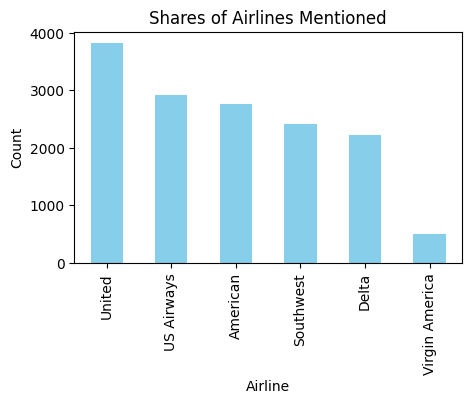

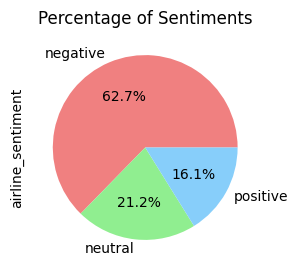

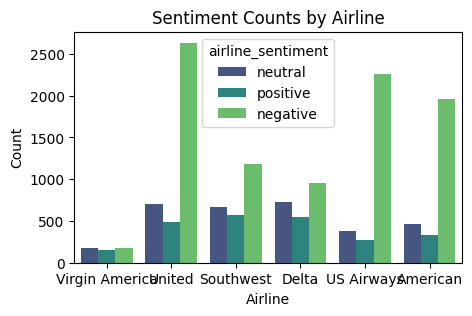

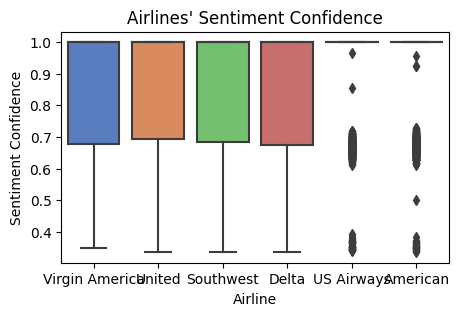



Confusion Matrix:
[[661 637 591]
 [199 185 196]
 [149 161 149]]

Classification Report:
              precision    recall  f1-score   support

    negative       0.66      0.35      0.46      1889
     neutral       0.19      0.32      0.24       580
    positive       0.16      0.32      0.21       459

    accuracy                           0.34      2928
   macro avg       0.33      0.33      0.30      2928
weighted avg       0.48      0.34      0.37      2928


Accuracy Score: 0.3398224043715847


In [17]:
import nltk
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
from sklearn.dummy import DummyClassifier

url = "Tweets.csv"
df = pd.read_csv(url)

# Printing first five rows
print("First five rows of the dataset:")
print(df.head(5))

# Plot the shares of airlines mentioned in the data
plt.figure(figsize=(5, 3))
df['airline'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Shares of Airlines Mentioned')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.show()

print("\n")
# Plot the percentage of positive, negative, and neutral sentiments
plt.figure(figsize=(5, 3))
df['airline_sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightgreen', 'lightskyblue'])
plt.title('Percentage of Sentiments')
plt.show()

print("\n")
#Bar chart showing the number of positive, negative, and neutral comments by airline
plt.figure(figsize=(5, 3))
sns.countplot(x='airline', hue='airline_sentiment', data=df, palette='viridis')
plt.title('Sentiment Counts by Airline')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.show()

print("\n")

#Using Seaborn, show airlines' sentiment confidence
plt.figure(figsize=(5, 3))
sns.boxplot(x='airline', y='airline_sentiment_confidence', data=df, palette='muted')
plt.title("Airlines' Sentiment Confidence")
plt.xlabel('Airline')
plt.ylabel('Sentiment Confidence')
plt.show()
print("\n")

#Define the features and labels
X = df['text']
y = df['airline_sentiment']

#clean the tweets
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  # Remove mentions
    text = re.sub(r'#', '', text)  # Remove hashtags
    text = re.sub(r'RT[\s]+', '', text)  # Remove retweets
    text = re.sub(r'https?:\/\/\S+', '', text)  # Remove hyperlinks
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = ' '.join([word for word in text.split() if word.lower() not in stop_words])  # Remove stopwords
    return text

X = X.apply(clean_text)

#vectorize the tweets
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

#Create a train and test (20%) dataset
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

#Import the RandomClassifier model
dummy_classifier = DummyClassifier(strategy='uniform', random_state=42)

#Define the 'predictions'
dummy_classifier.fit(X_train, y_train)
predictions = dummy_classifier.predict(X_test)

#Generate the confusion matrix, classification report, and accuracy score
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print("\nAccuracy Score:", accuracy)


## Conclusion

* In conclusion, the random guesser model we used achieved an overall accuracy of 34%. Although it did okay in predicting negative sentiments accurately, it had trouble identifying most of the actual negative sentiments. It performed poorly in predicting neutral and positive sentiments.
* These findings underscore that relying on random guessing is not effective for sentiment analysis on this dataset, and better, more advanced models are needed to improve accuracy.